In [1]:
using PyPlot

In [2]:
include("../src/SparseKMeans.jl")
include("../src/RobustKMeans.jl")
include("../src/DataGeneration.jl");

Academic license - for non-commercial use only


# Data generation

In [5]:
n = 500
d = 10000
p = 2
K = 3
X, true_assignments, true_features = generate_random_data(n, d, p, K);

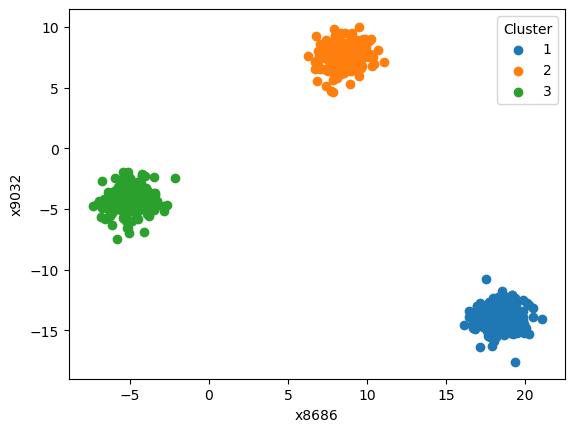

In [6]:
for k=1:K
    plt.scatter(X[true_assignments .== k, true_features[1]], X[true_assignments .== k, true_features[2]], label=k)
end
plt.xlabel("x$(true_features[1])")
plt.ylabel("x$(true_features[2])")
plt.legend(title="Cluster");

# Sparse k-Means

In [8]:
selected_features, cluster_assignments = sparse_kmeans(X, K, p);

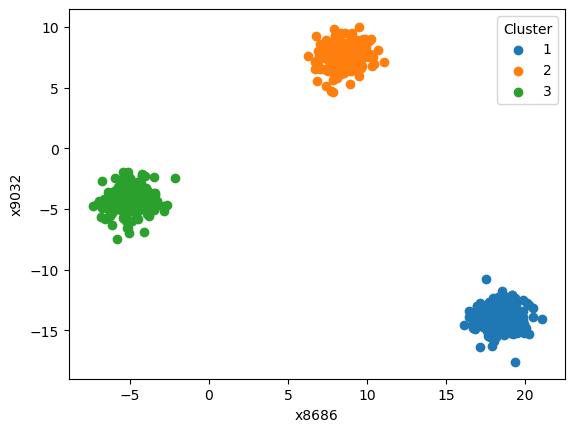

In [9]:
for k=1:K
    plt.scatter(X[cluster_assignments .== k, selected_features[1]], 
        X[cluster_assignments .== k, selected_features[2]], label=k)
end
plt.xlabel("x$(selected_features[1])")
plt.ylabel("x$(selected_features[2])")
plt.legend(title="Cluster");

# Robust K-Means

In [98]:
weights, cluster_assignments_robust = robust_kmeans(X, 3, λ=10.0, tol=1e-5);

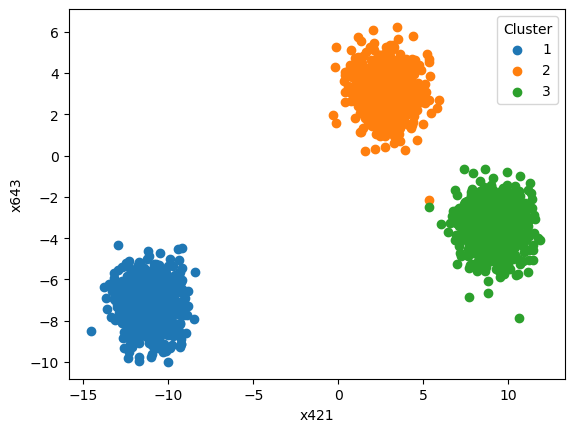

In [99]:
j1 = argmax(weights)
j2 = argmax(weights .* ([j for j=1:d] .!= j1))
for k=1:K
    plt.scatter(X[cluster_assignments_robust .== k, j1], X[cluster_assignments_robust .== k, j2], label=k)
end
plt.xlabel("x$j1")
plt.ylabel("x$j2")
plt.legend(title="Cluster");